In [42]:
import numpy as np 
import pandas as pd 

In [43]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [44]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [46]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [47]:
df_4 = df[df['Chest pain type']==4]

In [48]:
df_4.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence


<AxesSubplot: ylabel='Frequency'>

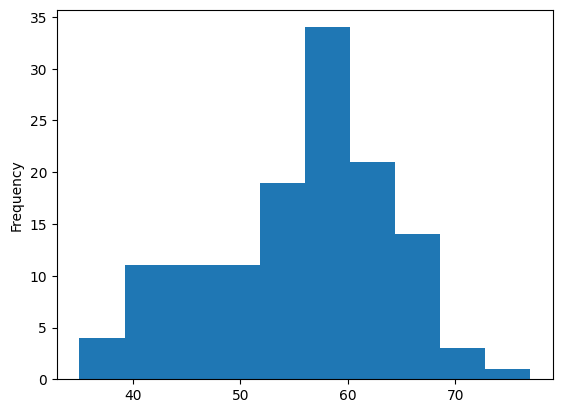

In [49]:
df_4['Age'].plot(kind='hist')

so from this dataset 

<AxesSubplot: >

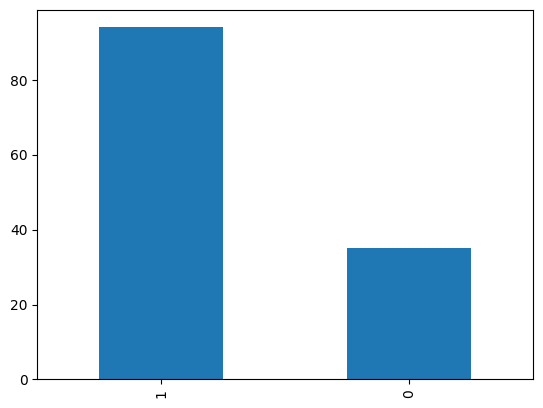

In [50]:
df_4['Sex'].value_counts().plot(kind='bar')

Now we find the insight that , the number of males are more which are suffering from the chest disease of type 4.

From this count of the Chest pain type , we know that the mostly people suffer from the type of chest pain 4.

In [51]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<AxesSubplot: ylabel='Frequency'>

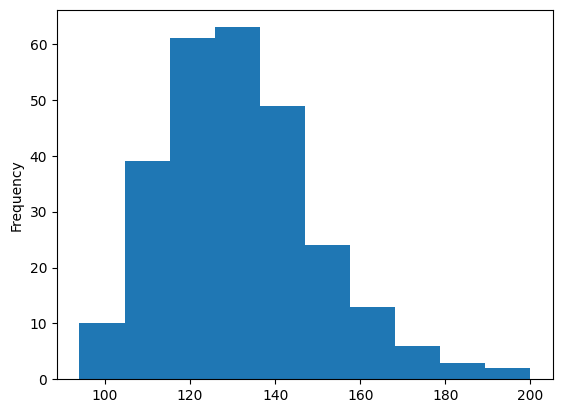

In [52]:
df['BP'].plot(kind='hist')

From this histogram we can find out that the number of peoples with high BP are in the range of BP 120 to 140

<AxesSubplot: xlabel='Age', ylabel='BP'>

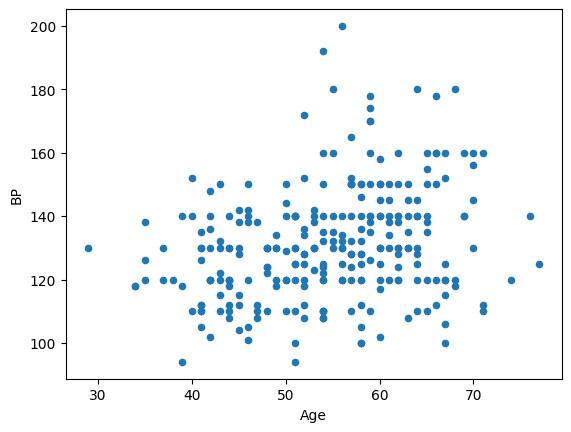

In [53]:
df.plot(kind='scatter',x='Age',y='BP')

from this insight we can find out that the most people are from the age group 50 to 60 years

--> Now we do the analysis of the Cholestrol feature

<AxesSubplot: ylabel='Frequency'>

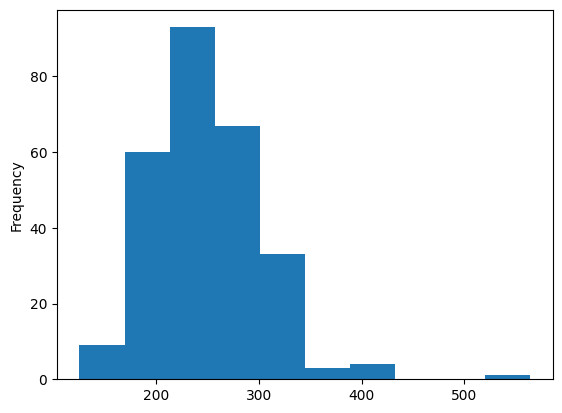

In [54]:
df['Cholesterol'].plot(kind='hist')

<AxesSubplot: >

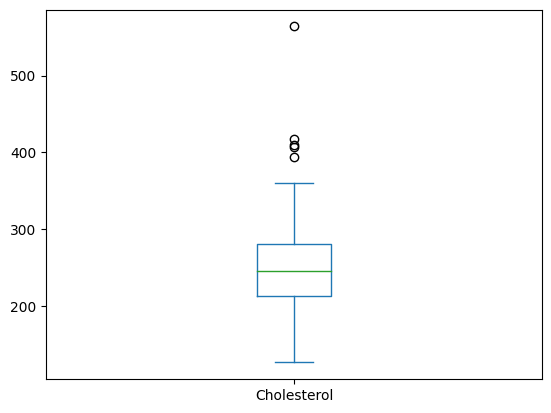

In [55]:
df['Cholesterol'].plot(kind='box')

Now for the best insight we do the 1.5 IQR technique to trimming out the outliers

In [56]:
df['Cholesterol'].describe()

count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: Cholesterol, dtype: float64

In [57]:
q1 = df['Cholesterol'].quantile(0.25)
q3 = df['Cholesterol'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

df_cleaned = df[(df['Cholesterol']>=lower_bound) & (df['Cholesterol']<=upper_bound)]


<AxesSubplot: >

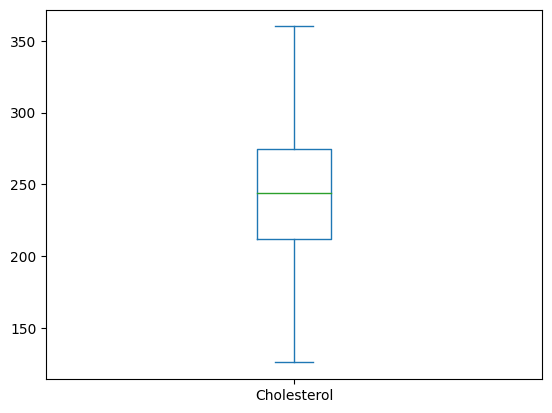

In [58]:
df_cleaned['Cholesterol'].plot(kind='box')

In [62]:
df_with_more_cholesterol = df[df['Cholesterol']>300]
df_with_more_cholesterol['Cholesterol'].value_counts().sum()

41

<AxesSubplot: ylabel='Frequency'>

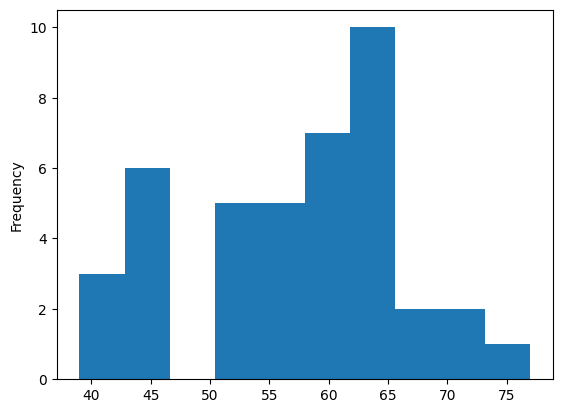

In [64]:
df_with_more_cholesterol['Age'].plot(kind='hist')

Now the data cleaning is done.

<AxesSubplot: xlabel='Age', ylabel='Cholesterol'>

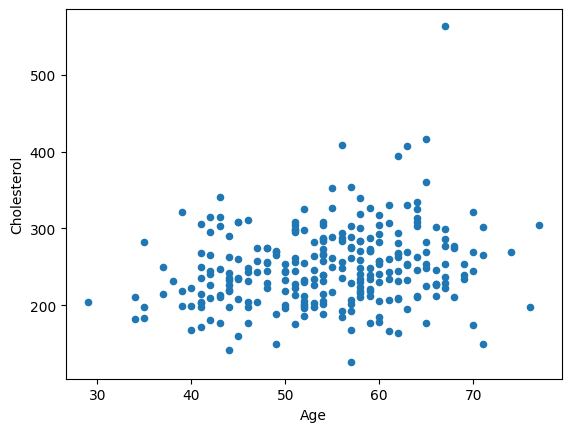

In [59]:
df.plot(kind='scatter',x='Age',y='Cholesterol')
# from this we can say that the most number of peoples with the cholesterol are from the age group of 50 to 60 age .

Now we work with the heart disease

In [65]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [66]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [67]:
df_with_presence = df[df['Heart Disease']=='Presence']
df_with_presence.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence


<AxesSubplot: >

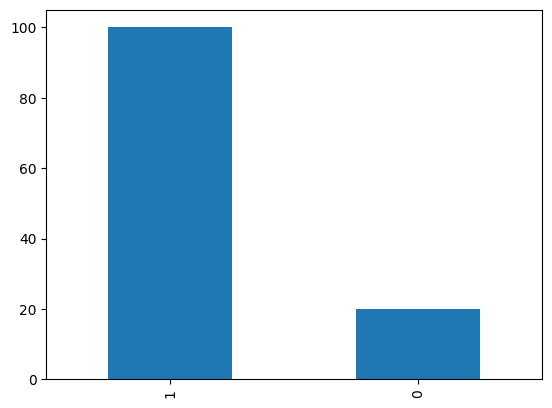

In [68]:
df_with_presence['Sex'].value_counts().plot(kind='bar')

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
cormat = df.corr()
round(cormat,2)

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_6492\3411523739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.00,-0.09,0.10,0.27,0.22,0.12,0.13,-0.40,0.10,0.19,0.16,0.36,0.11
Sex,-0.09,1.00,0.03,-0.06,-0.20,0.04,0.04,-0.08,0.18,0.10,0.05,0.09,0.39
Chest pain type,0.10,0.03,1.00,-0.04,0.09,-0.10,0.07,-0.32,0.35,0.17,0.14,0.23,0.26
BP,0.27,-0.06,-0.04,1.00,0.17,0.16,0.12,-0.04,0.08,0.22,0.14,0.09,0.13
Cholesterol,0.22,-0.20,0.09,0.17,1.00,0.03,0.17,-0.02,0.08,0.03,-0.01,0.13,0.03
FBS over 120,0.12,0.04,-0.10,0.16,0.03,1.00,0.05,0.02,-0.00,-0.03,0.04,0.12,0.05
EKG results,0.13,0.04,0.07,0.12,0.17,0.05,1.00,-0.07,0.10,0.12,0.16,0.11,0.01
Max HR,-0.40,-0.08,-0.32,-0.04,-0.02,0.02,-0.07,1.00,-0.38,-0.35,-0.39,-0.27,-0.25
Exercise angina,0.10,0.18,0.35,0.08,0.08,-0.00,0.10,-0.38,1.00,0.27,0.26,0.15,0.32
ST depression,0.19,0.10,0.17,0.22,0.03,-0.03,0.12,-0.35,0.27,1.00,0.61,0.26,0.32


<AxesSubplot: >

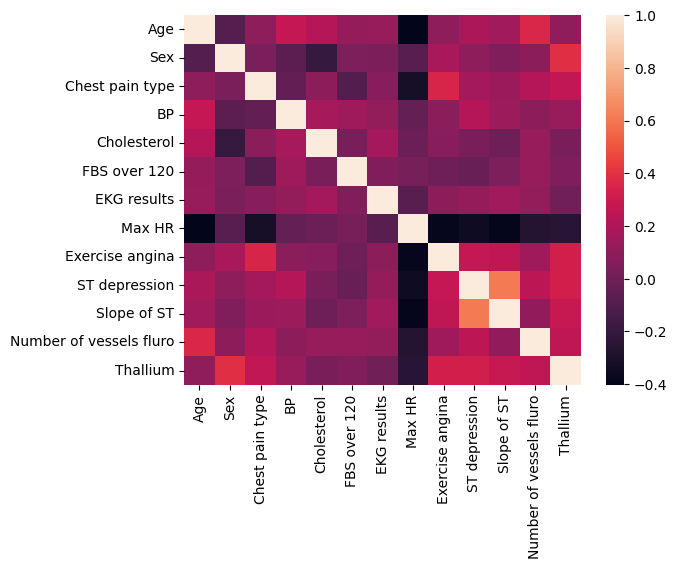

In [77]:
sns.heatmap(cormat)